In this lecture, we study variants of linear classical linear models. Spedifically, we focus on the regularized versions of the linear models. We will borrow the previously-used housing dataset to compare each method and use the classical linear regression result as their benchmark to illsutrate the differences in their respective results and methodologies. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.display import Image  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars

%matplotlib inline

In [15]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

Let's first load our dataset and then run a simple linear regression as our benchmark model. We will skip all of the exploratory analysis since we have seen the dataset before. Our goal is to use all covariates from the buyer information to predict housing prices. We will also do the train-test split after cleaning up the dataset:

In [3]:
USAhousing = pd.read_csv('USA_HousingData.csv')
dummies = pd.get_dummies(USAhousing['State'])
USAhousing = pd.concat([USAhousing, dummies], axis=1)  
USAhousing.drop(['State', 'Foreign'], inplace=True, axis=1) # dropping the original'State' variable (original) and the newly created variable 'Foreign'     
varlist=list(USAhousing.columns)
varlist.remove('Price')
print('Variable list: ', varlist, '\n')

X = USAhousing[list(varlist)]
y = USAhousing['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 30% test data and setting the seed

Variable list:  ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'CA', 'CO', 'IL', 'MN', 'NJ', 'NY', 'TX'] 



                                Coefficient
Avg. Area Income                  21.621190
Avg. Area House Age           165116.905787
Avg. Area Number of Rooms     121419.162935
Avg. Area Number of Bedrooms    1305.112043
Area Population                   15.238323
CA                            -19432.119771
CO                            -21504.101066
IL                            -15843.622300
MN                             -5413.281430
NJ                            -14425.674728
NY                            -11817.224946
TX                            -17195.023736 

***Model Evaluation***
RMSE from Classical OLS: 100719.9347465788


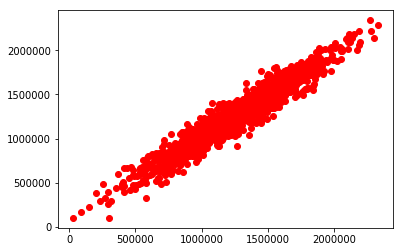

In [4]:
OLS = LinearRegression() # creating an instance of linear model
OLS.fit(X_train, y_train) # fitting the data
coeff_OLS = pd.DataFrame(OLS.coef_,X.columns,columns=['Coefficient'])
print(coeff_OLS, '\n')

predictions =OLS.predict(X_test)
RMSE_OLS=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('***Model Evaluation***')
print('RMSE from Classical OLS:', RMSE_OLS)
plt.scatter(y_test,predictions, color='red')

We now officially start our discussion with the ridge regression. Ridge regression addresses some of the problems of OLS regresssion by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares, so that it can mitigate the collinearity problem. The criteria function for the ridge regression is given by the following: $$min{\|X\beta-y\|^2 + \alpha\|\beta\|^2}$$.

Here the non-negative Lagrange coefficient $\alpha$ is the complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. As $\alpha$  goes up more in value, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.

                                Coefficient
Avg. Area Income                  21.621201
Avg. Area House Age           165115.986558
Avg. Area Number of Rooms     121418.241189
Avg. Area Number of Bedrooms    1305.498972
Area Population                   15.238303
CA                            -19361.532757
CO                            -21433.504664
IL                            -15772.489414
MN                             -5342.023925
NJ                            -14354.833384
NY                            -11746.809704
TX                            -17123.876599 

***Model Evaluation***
RMSE from Ridge Regression: 100720.06166949969


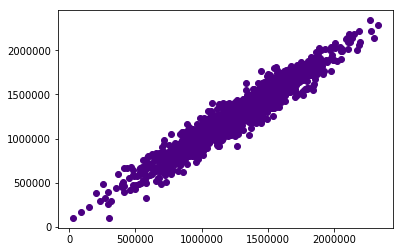

In [5]:
ridge = linear_model.Ridge(alpha=0.02)
ridge.fit(X_train, y_train) 
coeff_ridge = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])
print(coeff_ridge, '\n')

predictions =ridge.predict(X_test)
RMSE_ridge=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('***Model Evaluation***')
print('RMSE from Ridge Regression:', RMSE_ridge)
plt.scatter(y_test,predictions, color='indigo')

Recall that the ridge regression is designed to mitigate the collinearity problems, so the regularization only shrinks the variables but not select the variables. In contrast, Lasso can achieve both shrinking and selecting. The Lasso() method uses the L1 penalization so some of theh coefficients can actually be shrunk to zero under certain choice of the tuning parameters. Let's try Lasso now:

                                Coefficient
Avg. Area Income                  21.621201
Avg. Area House Age           165115.986558
Avg. Area Number of Rooms     121418.241189
Avg. Area Number of Bedrooms    1305.498972
Area Population                   15.238303
CA                            -19361.532757
CO                            -21433.504664
IL                            -15772.489414
MN                             -5342.023925
NJ                            -14354.833384
NY                            -11746.809704
TX                            -17123.876599 

***Model Evaluation***
RMSE from Lasso: 100719.9495250445


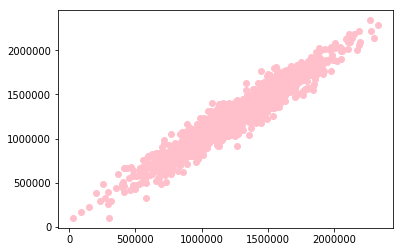

In [6]:
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train) 
coeff_lasso = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])
print(coeff_ridge, '\n')

predictions =lasso.predict(X_test)
RMSE_lasso=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('***Model Evaluation***')
print('RMSE from Lasso:', RMSE_lasso)
plt.scatter(y_test,predictions, color='pink')

Keep in mind that implementing ridge regression and the Lasso requires a method for selecting a value for the tuning parameters Cross-validation provides a simple way to tackle this problem. We choose a grid of the hypterparameter values, and compute
the cross-validation error for each value of the hypterparameter. We then select the tuning parameter value for which the cross-validation error is smallest. Finally, the model is re-fit using all of the available observations and the selected value of the tuning parameter.

The elastic net is a hybrid version of Lasso and ridge regressions using both L1 and L2 regularizations. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso(), while still maintaining the regularization properties of Ridge(). We control the convex combination of L1 and L2 using the 'l1_ratio' parameter. Elastic net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both. A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

Technically speaking, the parameter 'l1_ratio' corresponds to alpha in the 'glmnet' R package while alpha corresponds to the lambda parameter in the 'glmnet' package in R. Specifically, l1_ratio = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable, unless you supply your own sequence of alpha.

                                Coefficient
Avg. Area Income                  21.550575
Avg. Area House Age           101060.824555
Avg. Area Number of Rooms      70654.594534
Avg. Area Number of Bedrooms   15598.804057
Area Population                   15.316275
CA                              -847.309050
CO                             -1769.025504
IL                               248.344056
MN                              1118.753754
NJ                               925.463394
NY                               675.107914
TX                              -695.652620 

***Model Evaluation***
RMSE from Elastic Net: 128598.81562429846


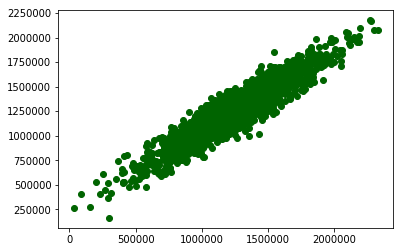

In [16]:
elasticnet = linear_model.ElasticNet(alpha=1, l1_ratio=0.4)
elasticnet.fit(X_train, y_train) 
coeff_elasticnet = pd.DataFrame(elasticnet.coef_,X.columns,columns=['Coefficient'])
print(coeff_elasticnet, '\n')

predictions =elasticnet.predict(X_test)
RMSE_elasticnet=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('***Model Evaluation***')
print('RMSE from Elastic Net:', RMSE_elasticnet)
plt.scatter(y_test,predictions, color='darkgreen')

Mathematically, ElasticNet() aims to solve the following problem ('Fro' denotes Frobenius norm):

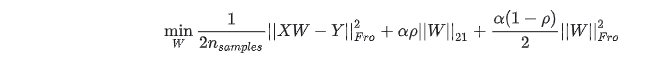

In [8]:
from IPython.display import Image
Image("elasticnet.PNG")

Forward stepwise regression is a computationally efficient alternative to the best subset selection. While the best subset selection procedure considers all possible models containing subsets of the p predictors (dimensionality of the covariates), forward stepwise considers a much smaller set of models. Forward stepwise selection begins with a model containing no predictors, and then adds predictors
to the model, one-at-a-time, until all of the predictors are in the model. In particular, at each step the variable that gives the greatest additional improvement to the fit is added to the model. More formally, the forward stepwise selection procedure is given in the following algorithm:

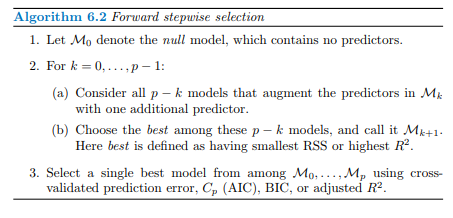

In [11]:
from IPython.display import Image
Image("forward stepwise regression algorithm.PNG")

Forward stepwise selection’s computational advantage over best subset selection is clear. Though forward stepwise tends to do well in practice, it is not guaranteed to find the best possible model out of all models containing subsets of the p predictors. 

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the predictor most correlated with the response. When there are multiple predictors having equal correlation, instead of continuing along the same predictor, it proceeds in a direction equiangular between the predictors. LAR is intimately connected with the Lasso, and in fact provides an extremely efficient algorithm for computing the entire Lasso path. 

More specifically, at the first step, LARS identifies the variable most correlated with the response. Rather than fit this variable completely, LARS moves the coefficient of this variable continuously toward its least-squares value (causing its correlation with the evolving residual to decrease in absolute value). As soon as another variable 'catches up' in terms of
correlation with the residual, the process is paused. The second variable then joins the active set, and their coefficients are moved together in a way that keeps their correlations tied and decreasing. This process is continue until all the variables are in the model, and ends at the full least-squares fit. If the dimension of the all the covariates is greater than n-1, the LAR algorithm reaches a zero residual solution after n-1 steps (the −1 is because we have centered the data).

The advantages of LARS are:
   1. It is numerically efficient in contexts when the number of dimensions is significantly greater than the number of points.
   2. It is computationally just as fast as forward selection and has the same order of complexity as an ordinary least squares. It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
   3. If two variables are almost equally correlated with the response, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
   4. It is easily modified to produce solutions for other estimators, like the Lasso.
   
The disadvantages of the LARS method is the following: because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article. 

The LARS model can be used using estimator Lars(), or its low-level implementation lars_path().

In a similar fashion, LassoLars() is a Lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate_descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.

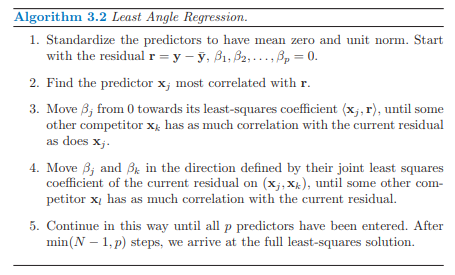

In [12]:
from IPython.display import Image
Image("LAR.PNG")

                                Coefficient
Avg. Area Income                  21.621190
Avg. Area House Age           165116.905787
Avg. Area Number of Rooms     121419.162935
Avg. Area Number of Bedrooms    1305.112043
Area Population                   15.238323
CA                            -19432.119771
CO                            -21504.101066
IL                            -15843.622300
MN                             -5413.281430
NJ                            -14425.674728
NY                            -11817.224946
TX                            -17195.023736 

***Model Evaluation***
RMSE from LARS: 100719.93474657675


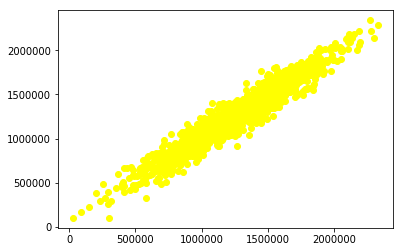

In [21]:
LARS = linear_model.Lars()
LARS.fit(X_train, y_train) 
coeff_LARS = pd.DataFrame(LARS.coef_,X.columns,columns=['Coefficient'])
print(coeff_LARS, '\n')

predictions =LARS.predict(X_test)
RMSE_LARS=np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('***Model Evaluation***')
print('RMSE from LARS:', RMSE_LARS)
plt.scatter(y_test,predictions, color='yellow')

References:
   - https://scikit-learn.org/stable/modules/linear_model.html
   - https://en.wikibooks.org/wiki/LaTeX/Mathematics
   - https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf
   